In [1]:
# Ensure both cohorts are matched in demographics after propensity score matching

In [6]:
import sys

parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
import os
from collections import Counter, OrderedDict
from name_generator import gen_black_name, gen_white_name
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from path import DATA_PROCESSED_COHORT_DIR

# Analyze names

In [7]:
aa_name_list = pd.read_csv(DATA_PROCESSED_COHORT_DIR / "aa_matched.csv")
ca_name_list = pd.read_csv(DATA_PROCESSED_COHORT_DIR / "ca_matched.csv")

In [8]:
aa_fn_list = aa_name_list["gender"].tolist()
ca_fn_list = ca_name_list["gender"].tolist()

In [9]:
ca_name_list["gender"].describe()

count     500
unique      2
top         f
freq      297
Name: gender, dtype: object

In [10]:
aa_counter = OrderedDict(sorted(Counter(aa_fn_list).items()))
aa_counter

OrderedDict([('f', 297), ('m', 203)])

In [11]:
ca_counter = OrderedDict(sorted(Counter(ca_fn_list).items()))
ca_counter

OrderedDict([('f', 297), ('m', 203)])

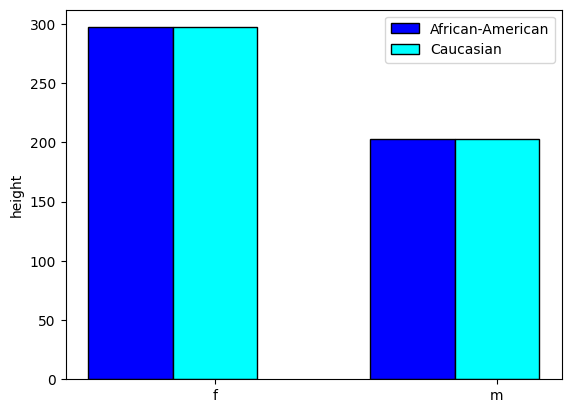

In [12]:
gender_means = {}

for k, v in aa_counter.items():
    gender_means[k] = (v, ca_counter[k])

# width of the bars
barWidth = 0.3

# Choose the height of the blue bars
bars1 = aa_counter.values()

# Choose the height of the cyan bars
bars2 = ca_counter.values()

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create blue bars
plt.bar(
    r1,
    bars1,
    width=barWidth,
    color="blue",
    edgecolor="black",
    capsize=7,
    label="African-American",
)

# Create cyan bars
plt.bar(
    r2,
    bars2,
    width=barWidth,
    color="cyan",
    edgecolor="black",
    capsize=7,
    label="Caucasian",
)

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], aa_counter.keys())
plt.ylabel("height")
plt.legend()

# Show graphic
plt.show()

# Next, we should validate ages are distributed evenly across names

In [15]:
from agefromname import AgeFromName
from document_generator import print_progress_bar
import pandas as pd
import datetime

In [16]:
aa_ages = aa_name_list["age"].tolist()
ca_ages = ca_name_list["age"].tolist()

In [17]:
aa_df = pd.DataFrame(aa_ages, columns=["aa_names"])
ca_df = pd.DataFrame(ca_ages, columns=["ca_names"])

In [18]:
aa_df.describe()

,aa_names
count,500.000000
mean,51.386000
std,21.195838
min,18.000000
25%,33.000000
50%,49.500000
75%,69.000000
max,102.000000


In [19]:
ca_df.describe()

,ca_names
count,500.000000
mean,51.386000
std,21.195838
min,18.000000
25%,33.000000
50%,49.500000
75%,69.000000
max,102.000000


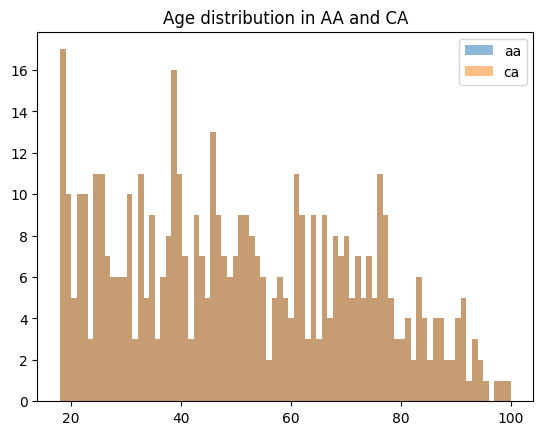

In [23]:
import random
import numpy
from matplotlib import pyplot

x = [aa_df["aa_names"].tolist()]
y = [ca_df["ca_names"].tolist()]

bins = numpy.linspace(18, 100, 100 - 18)

pyplot.hist(x, bins, alpha=0.5, label="aa")
pyplot.hist(y, bins, alpha=0.5, label="ca")
pyplot.legend(loc="upper right")
pyplot.title("Age distribution in AA and CA")
pyplot.show()

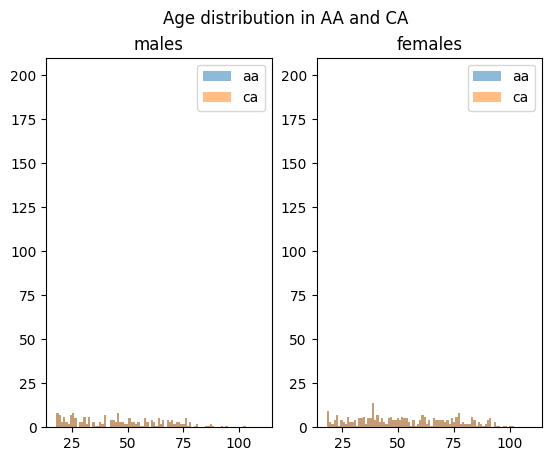

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Age distribution in AA and CA")

x = aa_name_list.loc[aa_name_list["gender"] == "m"]["age"].tolist()
y = ca_name_list.loc[ca_name_list["gender"] == "m"]["age"].tolist()

bins = numpy.linspace(18, 110, 110 - 18)

ax1.hist(x, bins, alpha=0.5, label="aa")
ax1.hist(y, bins, alpha=0.5, label="ca")
ax1.set_title("males")
ax1.set_ylim([0, 210])
ax1.legend(loc="upper right")

x = aa_name_list.loc[aa_name_list["gender"] == "f"]["age"].tolist()
y = ca_name_list.loc[ca_name_list["gender"] == "f"]["age"].tolist()
ax2.hist(x, bins, alpha=0.5, label="aa")
ax2.hist(y, bins, alpha=0.5, label="ca")
ax2.set_title("females")
ax2.set_ylim([0, 210])
ax2.legend(loc="upper right")